# Artificial Intelligence Nanodegree

## Convolutional Neural Networks
---
Convolutional Neural Networks


### 1. Load CIFAR-10 Database

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint   
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 24 Training Images


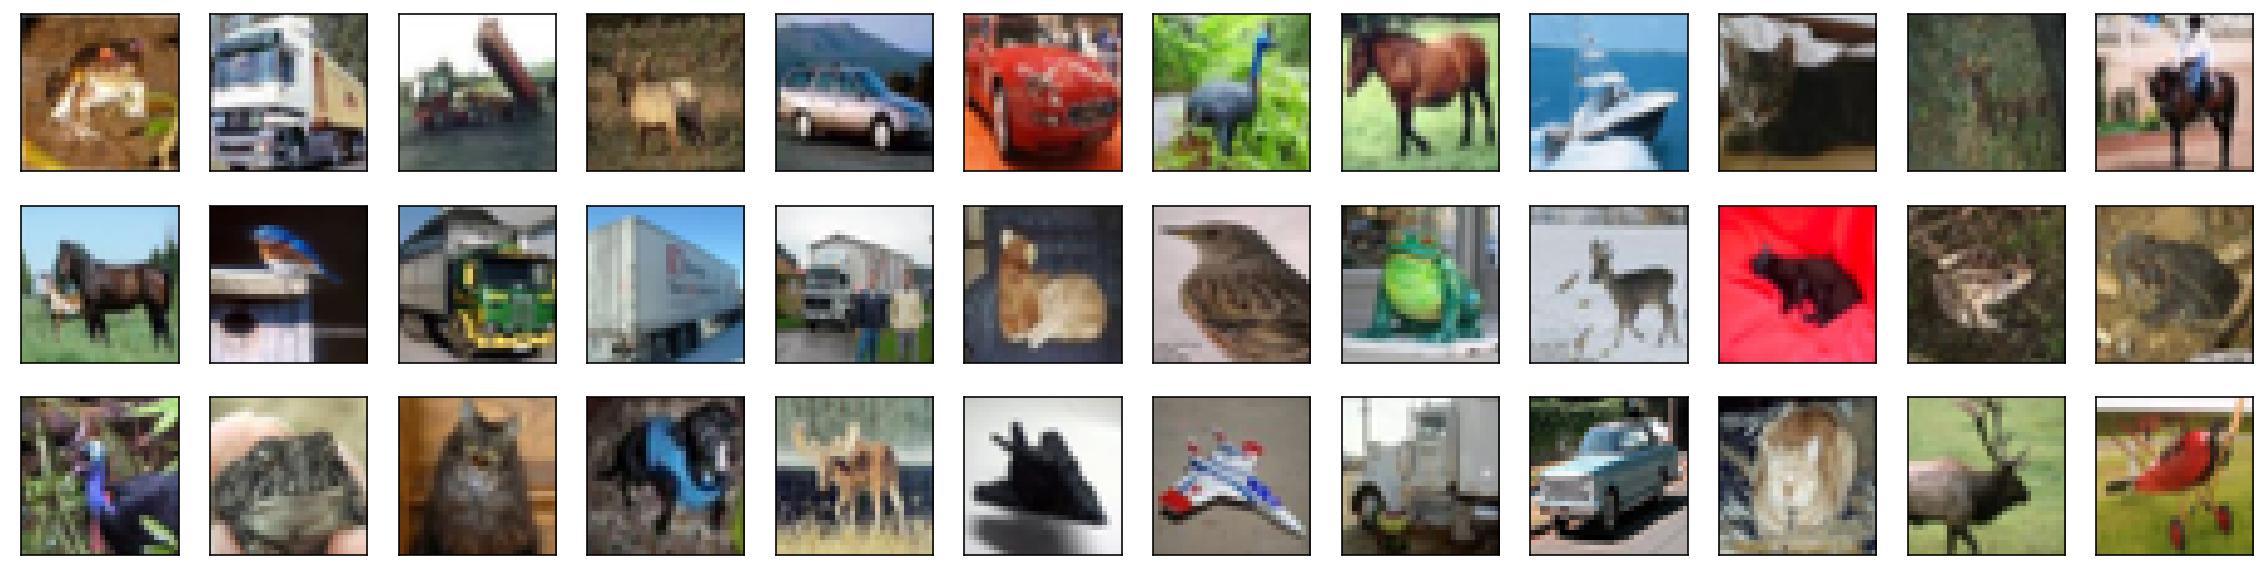

In [4]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255


In [5]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### 4. Break Dataset into Training, Testing, and Validation Sets


In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Create and Configure Augmented Image Generator


In [8]:
# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

### 6. Visualize Original and Augmented Images


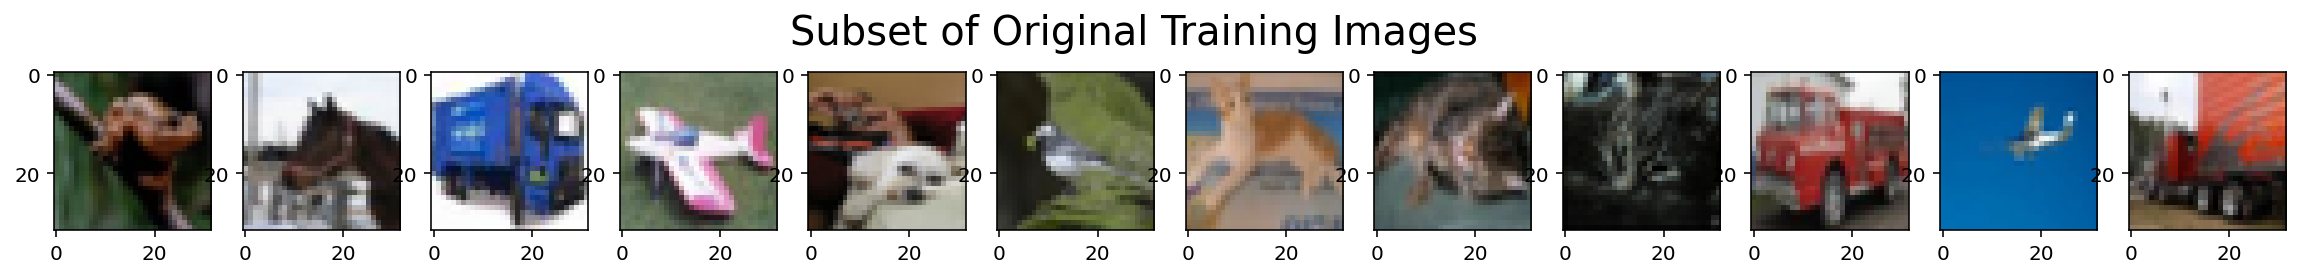

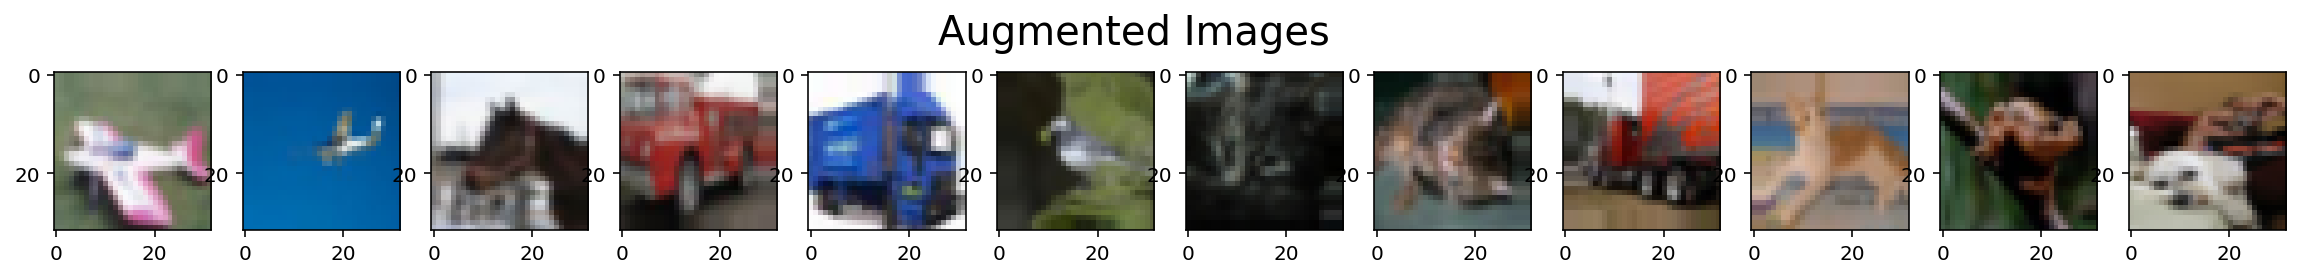

In [9]:
# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

### 7. Define the Model Architecture


In [10]:
model = Sequential([
    Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=((32,32,3))),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Flatten(),
    Dense(500, activation='relu'),
    
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

### 8. Compile the Model


In [11]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 9. Train the Model


In [12]:
x_train.shape, y_train.shape

((45000, 32, 32, 3), (45000, 10))

In [13]:
batch_size = 32
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

model.fit(datagen_train.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=x_train.shape[0] // batch_size,
          epochs=epochs, verbose=2, callbacks=[checkpointer],
          validation_data=(x_valid, y_valid),
          validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.30920, saving model to aug_model.weights.best.hdf5
1406/1406 - 36s - loss: 1.5984 - accuracy: 0.4167 - val_loss: 1.3092 - val_accuracy: 0.5276
Epoch 2/100
1406/1406 - 35s - loss: 1.2731 - accuracy: 0.5434
Epoch 3/100
1406/1406 - 36s - loss: 1.1289 - accuracy: 0.6010
Epoch 4/100
1406/1406 - 37s - loss: 1.0421 - accuracy: 0.6328
Epoch 5/100
1406/1406 - 37s - loss: 0.9814 - accuracy: 0.6568
Epoch 6/100
1406/1406 - 36s - loss: 0.9472 - accuracy: 0.6690
Epoch 7/100
1406/1406 - 38s - loss: 0.9135 - accuracy: 0.6810
Epoch 8/100
1406/1406 - 36s - loss: 0.8953 - accuracy: 0.6908
Epoch 9/100
1406/1406 - 36s - loss: 0.8782 - accuracy: 0.6958
Epoch 10/100
1406/1406 - 36s - loss: 0.8685 - accuracy: 0.6998
Epoch 11/100
1406/1406 - 35s - loss: 0.8624 - accuracy: 0.7034
Epoch 12/100
1406/1406 - 35s - loss: 0.8695 - accuracy: 0.7041
Epoch 13/100
1406/1406 - 35s - loss: 0.8674 - accuracy: 0.7039
Epoch 14/100
1406/1406 - 35s - loss: 0.8669 - accur

### 10. Load the Model with the Best Validation Accuracy


In [14]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

### 11. Calculate Classification Accuracy on Test Set


In [15]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5299000144004822
